## 📘 Project Title: EDA Students

**Author:** Juan Martín Flores  
**Date:** 2025-06-04
**Description:** This notebook performs an exploratory data analysis (EDA) on the Students Performance dataset from Kaggle") in order to To understand the influence of the parents background, test preparation and other variables available on students performance.
**Tools:** Python (Pandas, Matplotlib, Seaborn), Google Colab / Jupyter  

---

### 📂 Dataset Info

- **Name:** students-performance.csv
- **Location:** ../data/students-performance.csv
- **Source:** [Kaggle / https://www.kaggle.com/datasets/spscientist/students-performance-in-exams]  

---

### 📈 Objective

- Have an understanding about a basic Exploratory Data Analysis process. 
- Perform EDA suggested steps on this data to obtain inshits on this data:
    - Understand the problem
    - Import & inspect data
    - Handling Missing values
    - Explore Data Characteristics
    - Perform Data Transformation
    - Visualize Data Relationships 
    - Handling Outliers
    - Communicate findings & insights. 
---

#### Understand the problem and the Data

We have data about score performance in students and we are try to understand the influence of the parents background, test preparation etc on students performance, as a way to practice EDA for this notebook. 

Source: Kaggle / https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

According to information provided by the webpage:
- Data is structure and in csv
- 100% of the data is valid, this means no mismatched or missing values. 
- Scores values follow a "normal" distribution. 
- 1 file, 8 columns

#### Import & Inspect Data

In [113]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [53]:
# Load dataset
df = pd.read_csv("/Users/jmfe2/VSC/data-portfolio/data/studentsperformance.csv")

In [42]:
df.shape  # (rowrs, columns)

(1000, 8)

In [44]:
df.columns  #

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [54]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [43]:
# Basic checks
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [46]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Handinlg Missing Values

In [ ]:
df.isnull().sum()  # check for missing values
# We have no missing values in this dataset

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Exploratore Data Characteristics

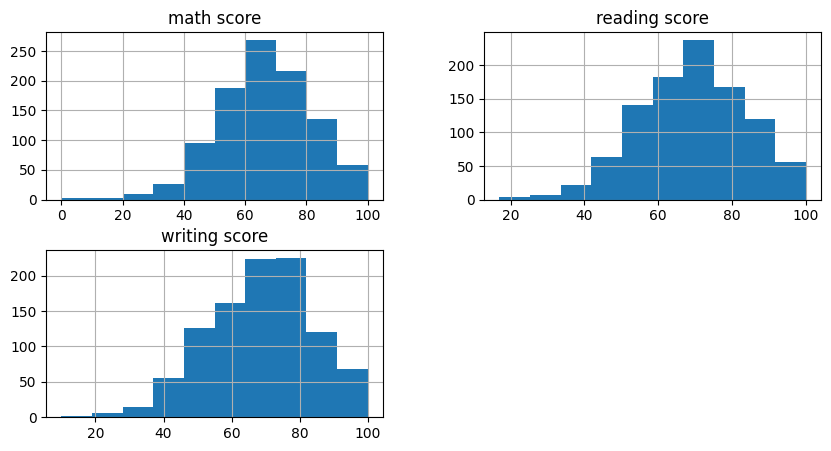

In [48]:
# We can use a histogram to visualize the distribution of scores
df[["math score", "reading score", "writing score"]].hist(figsize=(10, 5))
plt.savefig(
    "/Users/jmfe2/VSC/data-portfolio/figures/01_students_eda/scores_histogram.png"
)  # Save the histogram plot in Images folde

plt.show()  # To Show the plot in the notebook

In [137]:
# score columns that we want to analyze
score_columns = ["math score", "reading score", "writing score"]


(%) gender
female    51.8
male      48.2
Name: proportion, dtype: float64

Gender Counts:
 gender
female    518
male      482
Name: count, dtype: int64


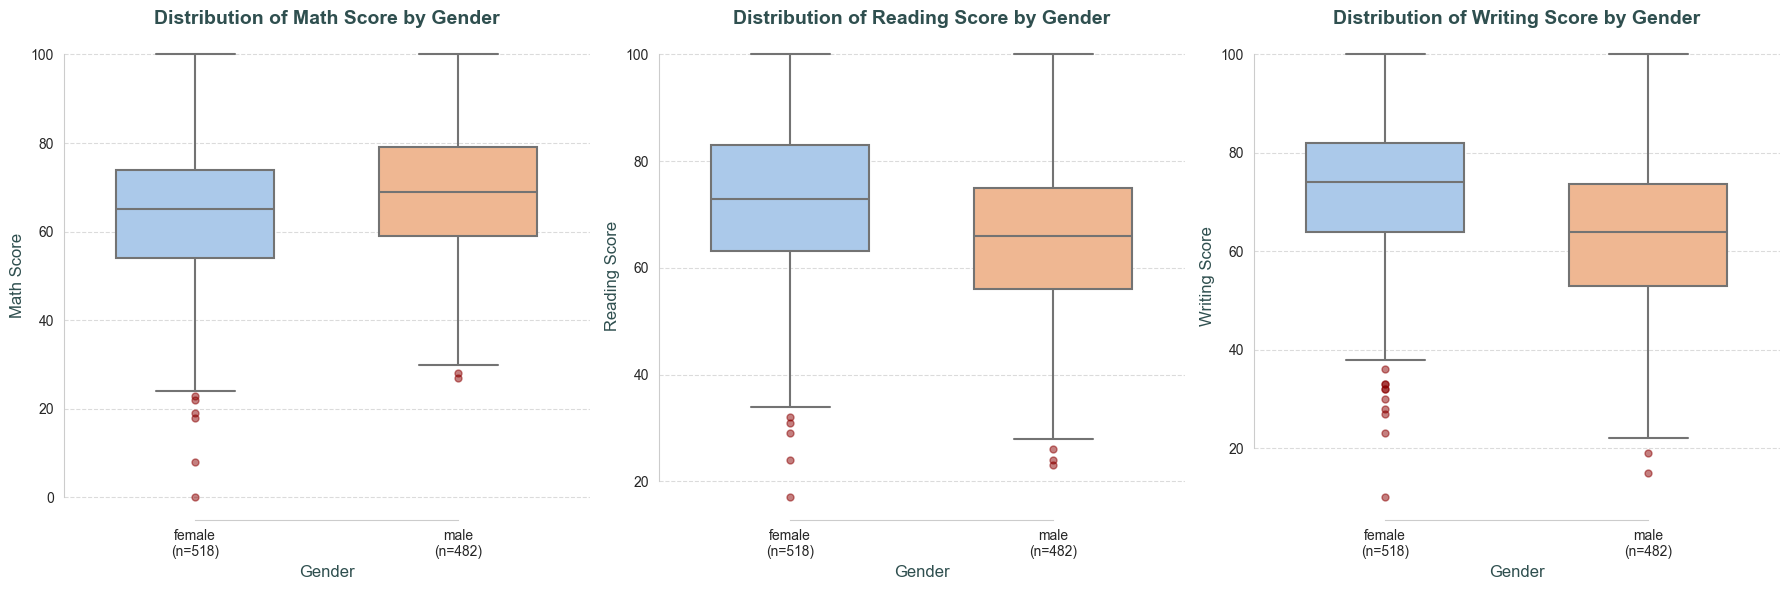

In [141]:
# --- Print Percentage Distribution of Gender Groups ---
# This shows the proportional representation of each gender in the dataset.
print(f"\n(%) {df['gender'].value_counts(normalize=True) * 100}")


# It computes how many individuals are in each gender group,
# and converts it to a dictionary for easy lookup when formatting labels.
gender_counts = df["gender"].value_counts()
gender_counts_dict = gender_counts.to_dict()
print("\nGender Counts:\n", gender_counts)

# --- Figure Setup ---
plt.figure(figsize=(18, 6))  # Set the overall figure size (width, height) in inches
sns.set_style("whitegrid")  # Apply a clean white background with a grid


for i, score_col in enumerate(score_columns):
    # Create a subplot: (rows, columns, current_plot_index)
    ax = plt.subplot(1, 3, i + 1)

    # --- Box Plot Creation ---
    sns.boxplot(
        data=df,  # Specify the DataFrame
        x="gender",  # Categorical variable for the x-axis
        y=score_col,  # Numerical variable for the y-axis (changes per loop iteration)
        hue="gender",  # Color the boxes based on gender categories
        palette="pastel",  # Choose a color palette for the boxes
        linewidth=1.5,  # Thickness of the box lines
        width=0.6,  # Width of the boxes
        fliersize=5,  # Adjusted fliersize for better visibility of outliers
        flierprops=dict(  # Properties for outlier points
            marker="o",  # Outlier marker shape (circle)
            markerfacecolor="darkred",  # Fill color of outlier markers
            markeredgecolor="darkred",  # Edge color of outlier markers
            alpha=0.5,  # Transparency of outlier markers (slightly more visible)
        ),
    )

    # --- Update X-axis Ticks to Include Counts ---
    # Get the current tick locations set by Seaborn
    current_x_tick_locations = ax.get_xticks()
    # Explicitly set the tick locations (this silences the warning)
    ax.set_xticks(current_x_tick_locations)

    current_x_labels = [label.get_text() for label in ax.get_xticklabels()]
    new_x_labels = []
    for label_text in current_x_labels:
        count = gender_counts_dict.get(label_text, 0)
        new_x_labels.append(f"{label_text}\n(n={count})")
    ax.set_xticklabels(new_x_labels, fontsize=10)

    # --- Plot Customization (Titles, Labels, Ticks) ---
    plt.title(
        f"Distribution of {score_col.replace('_', ' ').title()} by Gender",
        fontsize=14,
        fontweight="bold",
        color="darkslategray",
    )
    plt.xlabel("Gender", fontsize=12, color="darkslategray")
    plt.ylabel(score_col.replace("_", " ").title(), fontsize=12, color="darkslategray")
    plt.yticks(fontsize=10)  # X-axis tick font size (applies to current subplot)

    # --- Grid and Spines ---
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    sns.despine(trim=True)


# --- Final Layout and Saving ---
plt.tight_layout()
plt.savefig(
    "/Users/jmfe2/VSC/data-portfolio/figures/01_students_eda/multi_score_boxplots_gender.png",
    dpi=300,
    bbox_inches="tight",
)
plt.show()



(%) race/ethnicity
group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: proportion, dtype: float64

Gender Counts:
 race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64


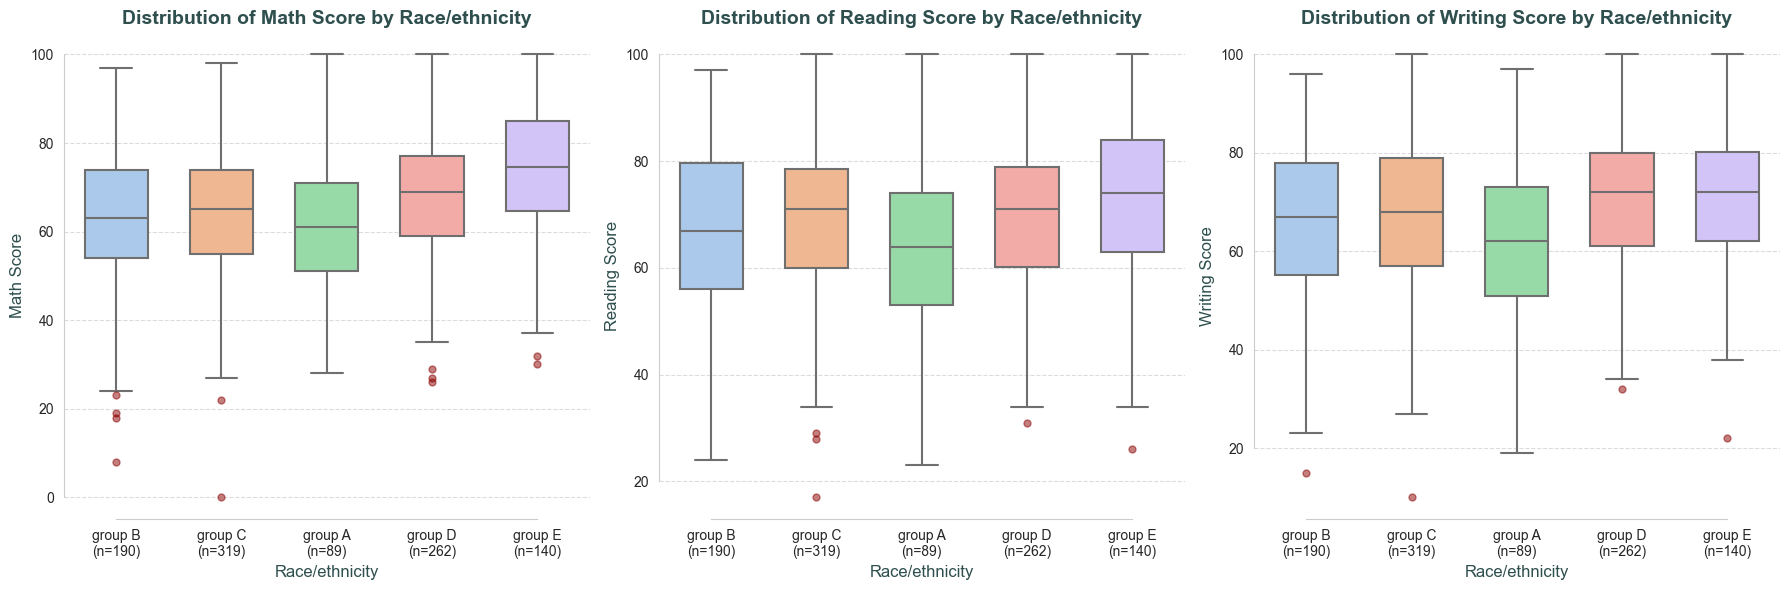

In [143]:
# --- Print Percentage Distribution of Gender Groups ---
# This shows the proportional representation of each race/etnicity in the dataset.
print(f"\n(%) {df['race/ethnicity'].value_counts(normalize=True) * 100}")


# It computes how many individuals are in each gender group,
# and converts it to a dictionary for easy lookup when formatting labels.
gender_counts = df["race/ethnicity"].value_counts()
gender_counts_dict = gender_counts.to_dict()
print("\nGender Counts:\n", gender_counts)

# --- Figure Setup ---
plt.figure(figsize=(18, 6))  # Set the overall figure size (width, height) in inches
sns.set_style("whitegrid")  # Apply a clean white background with a grid


for i, score_col in enumerate(score_columns):
    # Create a subplot: (rows, columns, current_plot_index)
    ax = plt.subplot(1, 3, i + 1)

    # --- Box Plot Creation ---
    sns.boxplot(
        data=df,  # Specify the DataFrame
        x="race/ethnicity",  # Categorical variable for the x-axis
        y=score_col,  # Numerical variable for the y-axis (changes per loop iteration)
        hue="race/ethnicity",  # Color the boxes based on gender categories
        palette="pastel",  # Choose a color palette for the boxes
        linewidth=1.5,  # Thickness of the box lines
        width=0.6,  # Width of the boxes
        fliersize=5,  # Adjusted fliersize for better visibility of outliers
        flierprops=dict(  # Properties for outlier points
            marker="o",  # Outlier marker shape (circle)
            markerfacecolor="darkred",  # Fill color of outlier markers
            markeredgecolor="darkred",  # Edge color of outlier markers
            alpha=0.5,  # Transparency of outlier markers (slightly more visible)
        ),
    )

    # --- Update X-axis Ticks to Include Counts ---
    # Get the current tick locations set by Seaborn
    current_x_tick_locations = ax.get_xticks()
    # Explicitly set the tick locations (this silences the warning)
    ax.set_xticks(current_x_tick_locations)

    current_x_labels = [label.get_text() for label in ax.get_xticklabels()]
    new_x_labels = []
    for label_text in current_x_labels:
        count = gender_counts_dict.get(label_text, 0)
        new_x_labels.append(f"{label_text}\n(n={count})")
    ax.set_xticklabels(new_x_labels, fontsize=10)

    # --- Plot Customization (Titles, Labels, Ticks) ---
    plt.title(
        f"Distribution of {score_col.replace('_', ' ').title()} by Race/ethnicity",
        fontsize=14,
        fontweight="bold",
        color="darkslategray",
    )
    plt.xlabel("Race/ethnicity", fontsize=12, color="darkslategray")
    plt.ylabel(score_col.replace("_", " ").title(), fontsize=12, color="darkslategray")
    plt.yticks(fontsize=10)  # X-axis tick font size (applies to current subplot)

    # --- Grid and Spines ---
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    sns.despine(trim=True)


# --- Final Layout and Saving ---
plt.tight_layout()
plt.savefig(
    "/Users/jmfe2/VSC/data-portfolio/figures/01_students_eda/multi_score_boxplots_race_ethnicity.png",
    dpi=300,
    bbox_inches="tight",
)
plt.show()


In [ ]:
parental_distribution = (
    df["parental level of education"].value_counts(normalize=True) * 100
)
parental_distribution

parental level of education
some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: proportion, dtype: float64

In [ ]:
lunch_distribution = df["lunch"].value_counts(normalize=True) * 100
lunch_distribution

lunch
standard        64.5
free/reduced    35.5
Name: proportion, dtype: float64

In [ ]:
test_preparation_distribution = (
    df["test preparation course"].value_counts(normalize=True) * 100
)
test_preparation_distribution


test preparation course
none         64.2
completed    35.8
Name: proportion, dtype: float64

<Axes: xlabel='gender'>

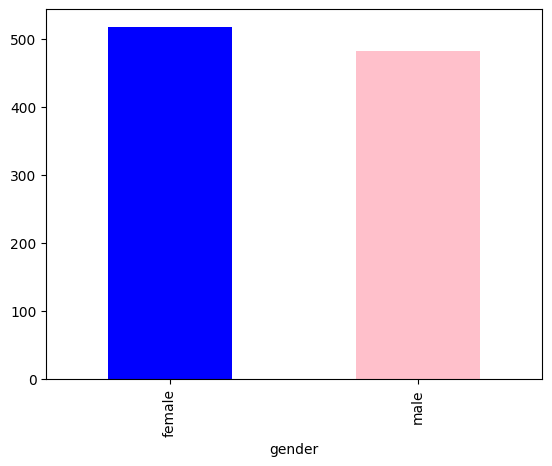

In [ ]:
df["gender"].value_counts().plot(kind="bar", color=["blue", "pink"])